# Introducción

Para este modelo, se creará un modelo que clasifique fotos de flores de 5 diferentes tipos, haciendo uso de visión computacional.

Los 5 tipos de flores son:
*   Margarita: Flor blanca con centro amarillo
*   Flor diente de león: Flor con pétalos amarillos
*   Rosas: Variando con colores de rojo, rosa y otros colores
*   Girasol: Pétalos amarillos con centro café
*   Tulipanes: De diferentes colores

Considero que este modelo puede servir para diferentes tipos de aplicaciones en el ámbito de venta de flores en línea, ya que se pueden cotizar ramos dependiendo de las flores que se usen.


# Datos

https://www.kaggle.com/datasets/rahmasleam/flowers-dataset

In [1]:
!pip install kaggle

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------  81.9/82.7 kB 2.2 MB/s eta 0:00:01
     ---------------------------------------- 82.7/82.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
   ---------------------------------------- 78.2/78.2 kB 4.2 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105803 sha256=9da7fdb931f0ba361b9c0f0c775b21e33a5478cd7c2d3f36ac910d6bc307b8a2
  Stored in directory: c:\users\julia\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [7]:

!chmod 600 kaggle.json

In [ ]:
!kaggle datasets download -d rahmasleam/flowers-dataset

^C


Dataset URL: https://www.kaggle.com/datasets/rahmasleam/flowers-dataset
License(s): apache-2.0
flowers-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
import zipfile
with zipfile.ZipFile("flowers-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("flowers_dataset")

In [11]:
import os
import pathlib
import random
import shutil

# Define la ruta del directorio base del dataset original y la nueva carpeta destino
base_dir = pathlib.Path("flowers_dataset/flower_photos")
destination_dir = pathlib.Path("flowers")  # Nueva carpeta principal

# Define las rutas de destino para train, validation y test dentro de "flowers"
train_dir = destination_dir / "train"
validation_dir = destination_dir / "validation"
test_dir = destination_dir / "test"

# Crear las carpetas de destino si no existen
for folder in [train_dir, validation_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

# Porcentaje de división
train_split = 0.7
validation_split = 0.15
test_split = 0.15

# Recorre cada subcarpeta en flower_photos (cada clase de flor)
for category_dir in base_dir.iterdir():
    if category_dir.is_dir():
        images = list(category_dir.glob("*.jpg"))  # Busca todas las imágenes en la subcarpeta
        random.shuffle(images)  # Mezcla las imágenes aleatoriamente

        # Calcula la cantidad de imágenes para cada conjunto
        train_count = int(len(images) * train_split)
        validation_count = int(len(images) * validation_split)

        # Define los conjuntos de imágenes
        train_images = images[:train_count]
        validation_images = images[train_count:train_count + validation_count]
        test_images = images[train_count + validation_count:]

        # Copia las imágenes a sus respectivas carpetas
        for image in train_images:
            dest_dir = train_dir / category_dir.name
            os.makedirs(dest_dir, exist_ok=True)
            shutil.copy(image, dest_dir / image.name)

        for image in validation_images:
            dest_dir = validation_dir / category_dir.name
            os.makedirs(dest_dir, exist_ok=True)
            shutil.copy(image, dest_dir / image.name)

        for image in test_images:
            dest_dir = test_dir / category_dir.name
            os.makedirs(dest_dir, exist_ok=True)
            shutil.copy(image, dest_dir / image.name)

print("Imágenes organizadas en la carpeta 'flowers' con subcarpetas train, validation y test.")


Imágenes organizadas en la carpeta 'flowers' con subcarpetas train, validation y test.


In [13]:
!pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     ----------------------- -------------- 30.7/48.7 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 272.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.1/1.2 MB 1.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.2 MB 2.5 MB/s eta 0:00:01
   ------------------ --------------------- 0.6/1.2 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 5.0 MB/s eta 0:00:00
   -----------------------------

In [15]:
!pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.3 MB 2.6 MB/s eta 0:02:28
   ---------------------------------------- 0.2/390.3 MB 3.8 MB/s eta 0:01:43
   ---------------------------------------- 0.5/390.3 MB 4.7 MB/s eta 0:01:23
   ---------------------------------------- 1.1/390.3 MB 6.1 MB/s eta 0:01:04
   ---------------------------------------- 1.9/390.3 MB 8.8 MB/s eta 0:00:44
   ---------------------------------------- 2.8/390.3 MB 11.3 MB/s eta 0:00:35
   ---------------------------------------- 3.8/390.3 MB 12.1 MB/s eta 0:00:32
    --------------------------------------- 5.4/390.3 MB 15.1 MB/s eta 0:00:26
    --------------------------------------- 6.8/390.3 MB 16.7 MB/s eta 0:00:23
    --------------------------------------- 8.6/390.3 MB 19.7 MB/s eta 0:00:20
   - -------------------------------------- 10.1/390.3 MB 20.9 MB/s eta 0:00:19
   - -------------------------------------- 11.6/390.3 MB 31.2 M

In [12]:
# Separamos el dataset y definimos el tamaño de las imágenes
import os, shutil, pathlib
from keras.utils import image_dataset_from_directory

base_dir = pathlib.Path("flowers")

# Cargar conjuntos de datos de entrenamiento, validación y prueba
train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(224, 224),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(224, 224),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(224, 224),
    batch_size=32
)


Found 3331 files belonging to 5 classes.
Found 1021 files belonging to 5 classes.
Found 1029 files belonging to 5 classes.


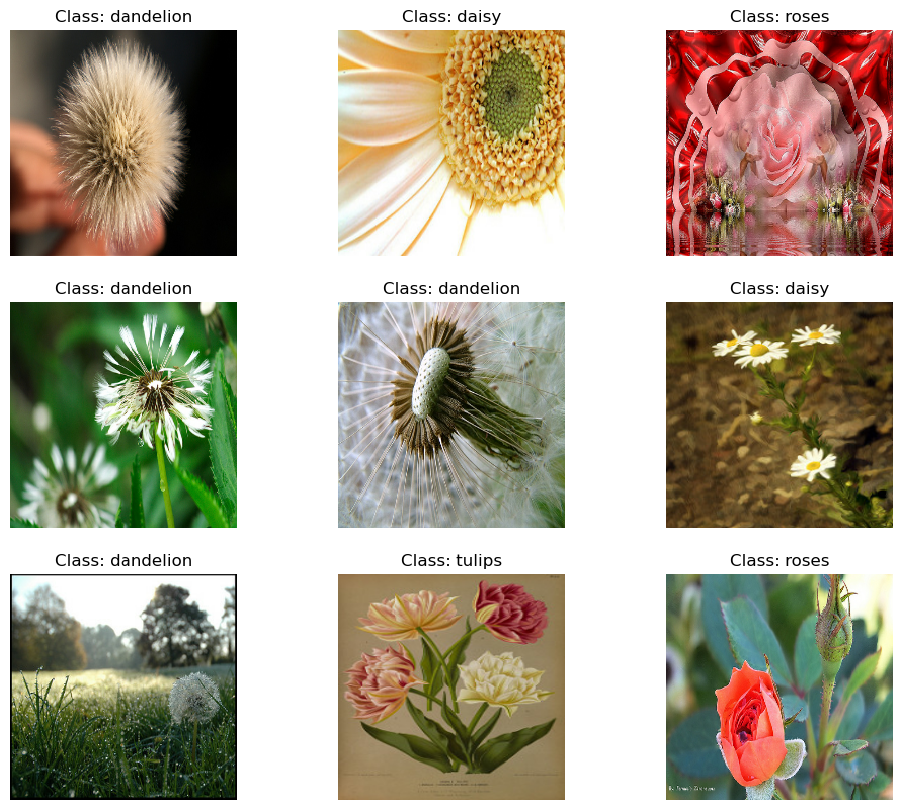

In [13]:
# Mostramos algunos ejemplos del dataset
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline

class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

plt.figure(figsize=(12, 10))
index = 0
for element in train_dataset.take(1):
  for i in range(9):
    image = element[0][i]
    label = element[1][i]
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image/255, interpolation="nearest")
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

Para este caso, no usaremos data augmentation como parte del pre-procesamiento de los datos, porque las clases están bien balanceadas, y metiéndole data augmentation podría llegar a quitar patrones que debe encontrar o incluso meter patrones no representativos de la clase que queremos clasificar

# Desarrollo del Modelo

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

model1 = models.Sequential()

# Capa de entrada con nuestro tamaño de imagen definido
model1.add(layers.InputLayer(input_shape=(224, 224, 3)))

# Capas de data augmentation para mejorar la generalización
model1.add(layers.RandomFlip("horizontal"))
model1.add(layers.RandomRotation(0.1))
model1.add(layers.RandomZoom(0.2))
model1.add(layers.Rescaling(1./255))  # Reescalado de valores

# Primer bloque de convolución simplificado con BatchNormalization
model1.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Segundo bloque de convolución simplificado con BatchNormalization
model1.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Reducción de dimensionalidad
model1.add(layers.GlobalAveragePooling2D())

# Capa de dropout para regularización
model1.add(layers.Dropout(0.3))

# Capa de salida con 5 clases
model1.add(layers.Dense(5, activation="softmax"))

# Compilación del modelo
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model1.summary()

c:\Users\julia\miniconda3\envs\ml_env\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,309 (40.27 KB)

 Trainable params: 10,309 (40.27 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model1.keras",
        save_best_only=True,
        monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,  # Número de épocas sin mejora para detener el entrenamiento
        restore_best_weights=True  # Restaura los mejores pesos al finalizar
    )
]

history = model1.fit(train_dataset, epochs=30,
                    validation_data=validation_dataset, callbacks=callbacks)

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = model1.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 30s 335ms/step - accuracy: 0.2691 - loss: 1.5795 - val_accuracy: 0.3803 - val_loss: 1.4605
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 329ms/step - accuracy: 0.3599 - loss: 1.4462 - val_accuracy: 0.3784 - val_loss: 1.3562
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 345ms/step - accuracy: 0.3956 - loss: 1.3526 - val_accuracy: 0.4717 - val_loss: 1.2475
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 341ms/step - accuracy: 0.4274 - loss: 1.2964 - val_accuracy: 0.4662 - val_loss: 1.2147
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 346ms/step - accuracy: 0.4637 - loss: 1.2532 - val_accuracy: 0.5155 - val_loss: 1.1906
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 329ms/step - accuracy: 0.4463 - loss: 1.2665 - val_accuracy: 0.4424 - val_loss: 1.1999
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 331ms/step - accuracy: 0.4672 - loss: 1.2449 - val_accuracy: 0.4899 - val_loss: 1.1699
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 27s 331ms/step - accuracy: 0.4730 - loss: 1.2282 - val_accu

In [ ]:
# Checamos el accuracy del modelo, con el dataset de test
# model = keras.models.load_model("model.keras")
test_loss, test_acc = model1.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 608ms/step - accuracy: 0.8066 - loss: 0.6020
Test accuracy: 0.791


In [102]:
model1.save('model0.keras')

Vamos a generar dos gráficas para visualizar el avance del modelo durante el entrenamiento:
Primero una gráfica de loss, el cual va mostrando el loss durante el entrenamiento y validación para ver si se genera overfitting, underfitting o si está aprendiendo bien
Segunda gráfica es del accuracy, e igual sirve para ver si se está haciendo overfitting, underfitting o si está aprendiendo bien

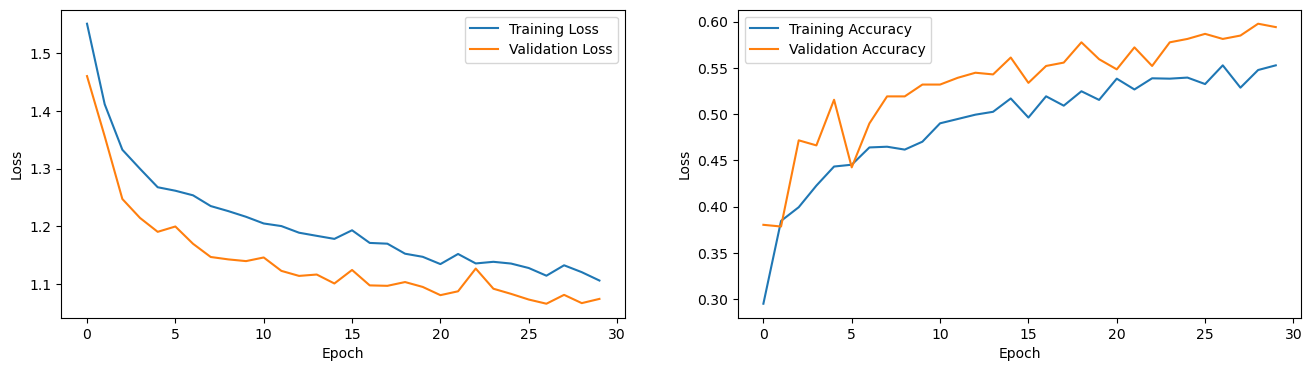

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

En las gráficas podemos ver, cómo el training loss y el validation loss van siempre de la mano e intentar converger, igualmente podemos ver cómo con el tiempo el modelo iba mejorando, aunque la mejora era poca con cada época

Para el training accuracy y validation accuracy es lo mismo, pero ahora vemos que el accuracy va subiendo con el tiempo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
La predicción para la imagen es: roses


(-0.5, 223.5, 223.5, -0.5)

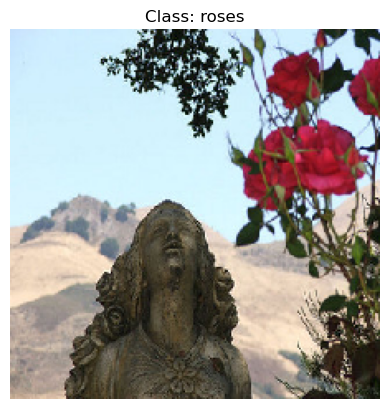

In [33]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import load_model

model = load_model("model0.keras")


# img_path = 'flowers/test/daisy/5794839_200acd910c_n.jpg'
img_path = 'flowers/test/roses/24781114_bc83aa811e_n.jpg'
# img_path = 'flowers/test/sunflowers/6953297_8576bf4ea3.jpg'
# img_path = 'flowers/test/tulips/113291410_1bdc718ed8_n.jpg'
# img_path = 'flowers/test/dandelion/15547944931_c1e095b185.jpg'

img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


predictions = model1.predict(img_array)

predicted_class = np.argmax(predictions, axis=-1)

class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
predicted_label = class_names[predicted_class[0]]

print(f"La predicción para la imagen es: {predicted_label}")

plt.imshow(img)
plt.title(f"Class: {predicted_label}")
plt.axis("off")

# Ajuste del Modelo

Probé con varios tipos de arquitectura, quitar la parte de data augmentation, cambiar el tamaño de kernels, probar diferentes funciones de activación, diferentes tamaños de capas, y cambiar el porcentaje de dropout, al final, este fue el mejor modelo que se consiguió

In [75]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

# Capa de entrada con nuestro tamaño de imagen definido
model.add(layers.InputLayer(input_shape=(224, 224, 3)))

# Agregamos capas de data augmentation dentro del modelo para que sea más sencillo generalizar otro tipo de imágenes
# Sólo agregamos random flips, rotation, zoom y reescalamos las imágenes para que sean un valor del 0 al 1
model.add(layers.RandomFlip("horizontal"))
model.add(layers.RandomRotation(0.1))
model.add(layers.RandomZoom(0.2))
model.add(layers.Rescaling(1./255))

# Usaremos 4 capas de convolución, cada una irá subiendo progresivamente el número de kernels
# Con un ancho estándar de 3x3, igualemente usando relu para quitar el vanishing gradient
# Igualmente un max pooling para reducir las dimensiones a la mitad
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# En lugar de flatten usamos global avg pooling para reducir cada mapa de características
# de la salida a un único valor promediado
model.add(layers.GlobalAveragePooling2D())

# Capa de dropout para eliminar reducir el riesgo de overfitting al igual pondremos early stopping después
model.add(layers.Dropout(0.3))

# Capa de salida de clasificación de 5 clases, usando softmax
model.add(layers.Dense(5, activation="softmax"))

# Compilamos con sparse categorical para no usar one hot encoding, y adam porque es de las mejores
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

c:\Users\julia\miniconda3\envs\ml_env\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_7 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_7               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_7 (RandomZoom)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,553,541 (5.93 MB)

 Trainable params: 1,553,541 (5.93 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model.keras",
        save_best_only=True,
        monitor="val_loss"
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,  # Número de épocas sin mejora para detener el entrenamiento
        restore_best_weights=True  # Restaura los mejores pesos al finalizar
    )
]

history = model.fit(train_dataset, epochs=50,
                    validation_data=validation_dataset, callbacks=callbacks)

# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test accuracy: {test_accuracy}")

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.3345 - loss: 1.4401 - val_accuracy: 0.4059 - val_loss: 1.2753
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.4355 - loss: 1.3405 - val_accuracy: 0.4717 - val_loss: 1.2891
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.4945 - loss: 1.1871 - val_accuracy: 0.5466 - val_loss: 1.1531
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.5210 - loss: 1.1096 - val_accuracy: 0.6124 - val_loss: 1.0313
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.6169 - loss: 0.9796 - val_accuracy: 0.6490 - val_loss: 0.9182
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.6226 - loss: 0.9631 - val_accuracy: 0.6472 - val_loss: 0.9309
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.6376 - loss: 0.9314 - val_accuracy: 0.6508 - val_loss: 0.8886
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.6552 - loss: 0.8770 - val_accuracy: 0.6618 - v

In [57]:
model.save('best_model.keras')

In [37]:
# Checamos el accuracy del modelo, con el dataset de test
model = keras.models.load_model("best_model.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 459ms/step - accuracy: 0.8261 - loss: 0.5133
Test accuracy: 0.821


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


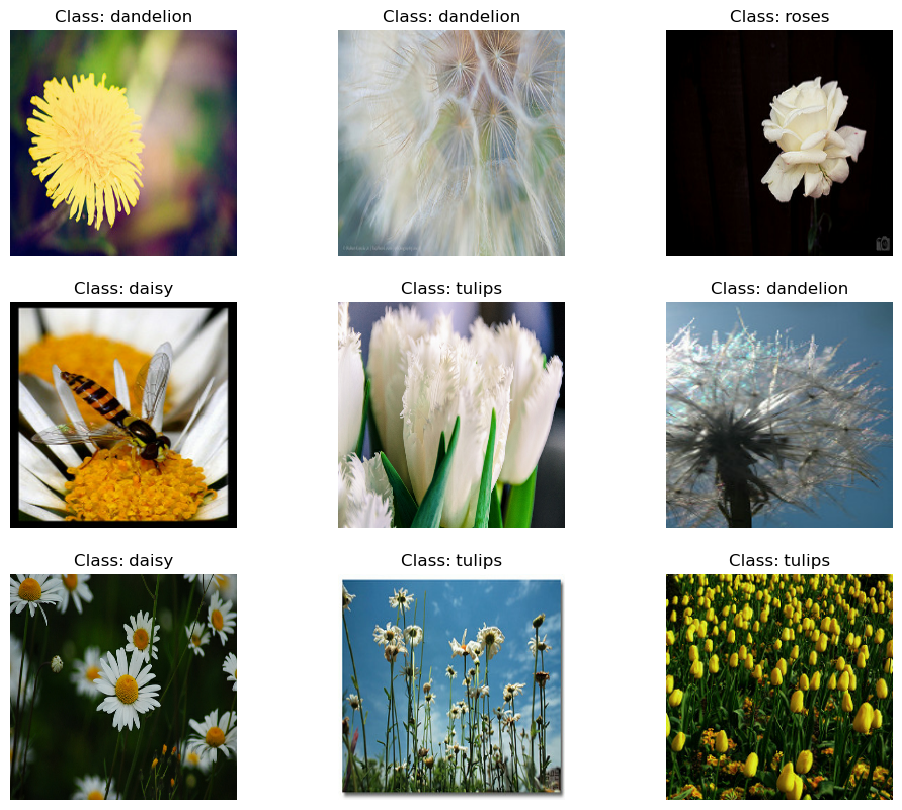

In [97]:
# Probamos el dataset de testing con 9 fotos y su predicted label para ver de manera gráfica las predicciones
plt.figure(figsize=(12, 10))
index = 0

for element in train_dataset.take(1):
    images = element[0]
    labels = element[1]

    for i in range(9):
        image = images[i].numpy()
        img_array = np.expand_dims(image, axis=0)

        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=-1)
        predicted_label = class_names[predicted_class[0]]

        index += 1
        plt.subplot(3, 3, index)
        plt.imshow(image / 255, interpolation="nearest")
        plt.title(f"Class: {predicted_label}")
        plt.axis("off")

plt.show()


# Resultados

Haciendo pruebas, sobreescribí el history de mi mejor modelo, pero se puede ver como el comportamiento es bueno ya que los valores de el loss y el accuracy tanto del training como de validation iban de la mano, y gracias igual al early stopping no hubo overfitting

Igualmente me di cuenta que el modelo es bastante bueno en general, probando con varias fotos que no había visto, y con todo el conjuntos de test. 
Se podría intentar poner un dataset con más fotos para mejorar el entrenamiento.

In [98]:
train_loss, train_accuracy = model.evaluate(train_dataset)
val_loss, val_accuracy = model.evaluate(validation_dataset)
test_loss, test_accuracy = model.evaluate(test_dataset)


print(f"Pérdida en entrenamiento: {train_loss}")
print(f"Precisión en entrenamiento: {train_accuracy}")
print(f"Pérdida en validación: {val_loss}")
print(f"Precisión en validación: {val_accuracy}")
print(f"Pérdida en test: {test_loss}")
print(f"Precisión en test: {test_accuracy}")

81/81 ━━━━━━━━━━━━━━━━━━━━ 51s 623ms/step - accuracy: 0.8496 - loss: 0.4240
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 590ms/step - accuracy: 0.7619 - loss: 0.5768
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 594ms/step - accuracy: 0.7874 - loss: 0.7002
Pérdida en entrenamiento: 0.39688581228256226
Precisión en entrenamiento: 0.8546941876411438
Pérdida en validación: 0.5886679291725159
Precisión en validación: 0.7806215882301331
Pérdida en test: 0.6461682915687561
Precisión en test: 0.7913669347763062


# Conclusiones

En conclusión, después de varias pruebas con diferentes arquitecturas de capas, y varios cambios en los parámetros de cada capa, así como en el compilador del modelo.
Concluí que no siempre es tan bueno crear un modelo tan complejo, pero tampoco uno tan simple: A comparación del primero, le agregué dos capas convolutivas y fui haciendo mi arquitectura a que fuera creciendo el tamaño del kernel con cada capa, de 64-128-256-512

Mi mejor modelo consiguió un accuracy de casi del 80% el cual es bueno, aunque considero que se puede mejorar

Para futuras implementaciones, le agregaría, a lo mejor unas capas de batch normalization para acelerar el entrenamiento, al igual que usar Grid Search para encontrar los mejores hiperparámetros, como si Adam es el mejor optimizer, al igual que experimentar con el learning rate, y con el batch size

Con esta implementación aprendí a hacer uso de visión computacional para hacer una clasificación múltiple, haciendo desde cero, una arquitectura adecuada para mi problema

# Aplicación

Aquí se genera un ciclo para iterar sobre 9 imágenes aleatorias y mostar la prediccón que hizo mi mejor modelo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


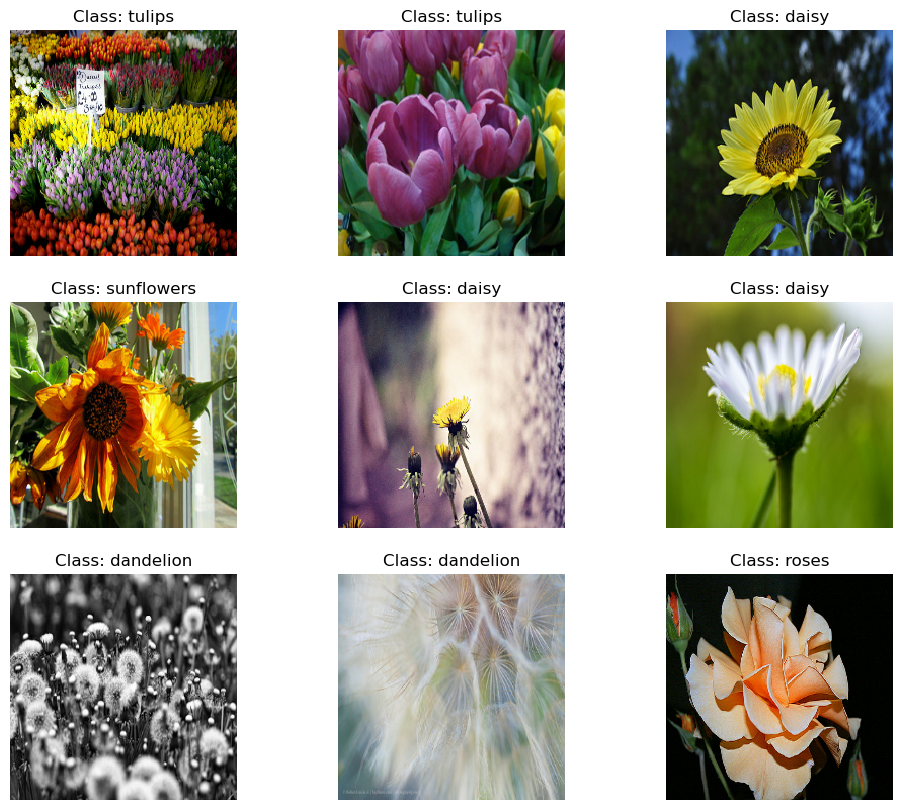

In [100]:
# Probamos el dataset de testing con 9 fotos y su predicted label para ver de manera gráfica las predicciones
plt.figure(figsize=(12, 10))
index = 0

for element in train_dataset.take(1):
    images = element[0]
    labels = element[1]

    for i in range(9):
        image = images[i].numpy()
        img_array = np.expand_dims(image, axis=0)

        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=-1)
        predicted_label = class_names[predicted_class[0]]

        index += 1
        plt.subplot(3, 3, index)
        plt.imshow(image / 255, interpolation="nearest")
        plt.title(f"Class: {predicted_label}")
        plt.axis("off")

plt.show()

 

Aplicación para cargar una imagen de tu explorador de archivos, cargarla en el modelo, y regresar y representar el modelo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


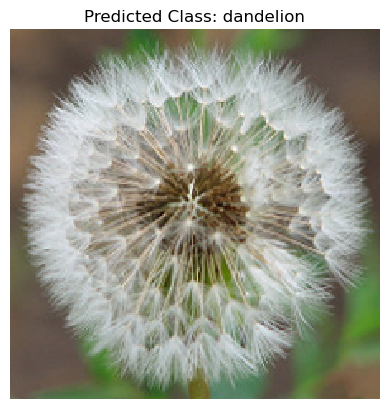

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename(
    title="Selecciona una imagen",
    filetypes=[("Archivos de imagen", "*.png;*.jpg;*.jpeg;")]
)

model = keras.models.load_model("best_model.keras")

if file_path:
    img = Image.open(file_path).resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=-1)
    predicted_label = class_names[predicted_class[0]]

    # Mostrar la imagen con la clase predicha
    plt.imshow(img, interpolation="nearest")
    plt.title(f"Predicted Class: {predicted_label}")
    plt.axis("off")
    plt.show()
else:
    print("No se seleccionó ninguna imagen.")